<a href="https://colab.research.google.com/github/JoonhyeonKim/Fun_with_practicing_DS/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch module

What does it do?

torchvision	Contains datasets, model architectures and image transformations often used for computer vision problems.

torchvision.datasets	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

torchvision.models	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

torchvision.transforms	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

torch.utils.data.Dataset	Base dataset class for PyTorch.

torch.utils.data.DataLoader	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Feb 28 02:02:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

For image model, there are two parts:

1. Feature extractor which takes input and then results (instance, features)
2. Classifier which takes (instance, features) and then results logits of (Instance ,Class) -> softmax(dim=1).argmax(dim=1)


In [2]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib fro visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your Pytorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


## Getting a dataset

root: str - which folder do you want to download the data to?

train: Bool - do you want the training or test split?

download: Bool - should the data be downloaded?
transform: torchvision.transforms - what transformations would you like to do on the data?

target_transform - you can transform the targets (labels) if you like too.

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15090597.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 279057.39it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5014773.19it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20524978.13it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
type(train_data)
type(test_data)

torchvision.datasets.mnist.FashionMNIST

In [5]:
i, l = train_data[0]


In [6]:
len(train_data)


60000

In [7]:
i.shape
# (channel, heght, width)

torch.Size([1, 28, 28])

In [8]:
l


9

In [9]:
image, label = i, l


In [10]:
# How many samples are there?
len(train_data.data)

60000

In [11]:
type(train_data)


torchvision.datasets.mnist.FashionMNIST

In [12]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)


(60000, 60000, 10000, 10000)

In [13]:
class_names = train_data.classes
len(class_names)

10

In [14]:
class_names[0]


'T-shirt/top'

In [15]:
len(class_names)
# there are ten classes

10

### Visualizing our data

Image shape: torch.Size([1, 28, 28])


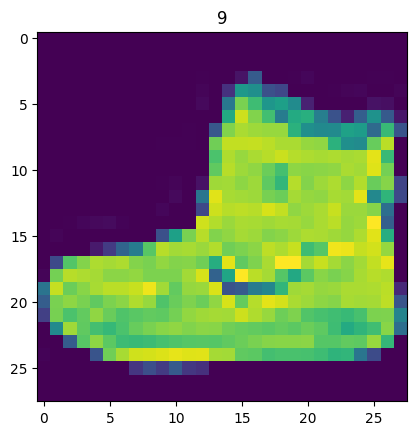

In [16]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # since color has only one channel, squeeze it

plt.title(label);

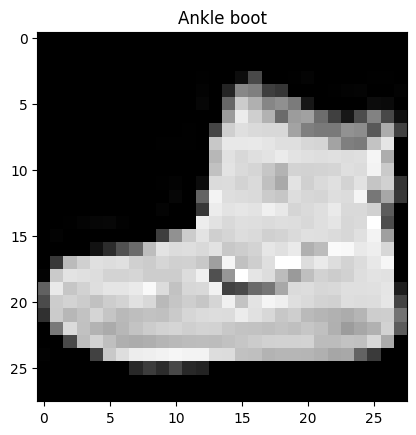

In [17]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]); # here class_names is a list while label for index

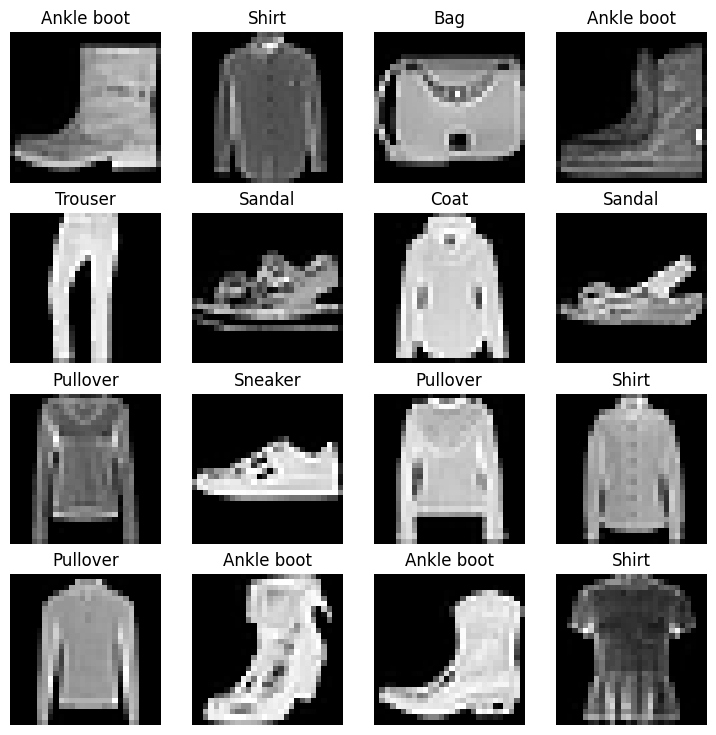

In [18]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1): # plus one since python exclude the last one step
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


## Prepare DataLoader

In [19]:
from torch.utils.data import DataLoader


In [20]:
BATCH_SIZE = 32


In [21]:
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # shuffle data every epoch? it should not set to be True if time series or sequence is important


In [22]:
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


one can also make custom dataloader that takes dataset and batch size and shuffle params

In [23]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e849b075600>, <torch.utils.data.dataloader.DataLoader object at 0x7e8498bab490>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [24]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape # so it is a classification task

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


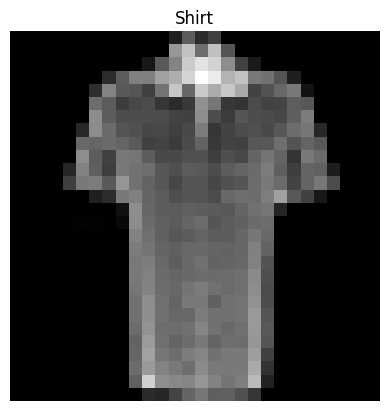

In [25]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() # there is also torch.rand(size) and then cast to int way to do that??
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [26]:
device = "cuda" if torch.cuda.is_available else "cpu"


## Model 0: Build a baseline model

In [27]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happend
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


(channel, height, width) -> (channel, height*width) -> (channel, features) -> (channel, classes)

flattener -> feature extractor -> classifier

In [28]:
flatten_model(torch.rand(size=(1,4,4,4))).shape


torch.Size([1, 64])

it does flatten all the dimension except the first one

In [29]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


In [30]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape = 28 * 28,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ) # one for every class
model_0.to(device) # then image -> flattened features -> class -> softmax -> argmax

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup loss, optimizer and evaluation metrics

In [31]:
import requests
from pathlib import Path

In [32]:
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [33]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

In [34]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion" or "cost function"
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Creating a function to time our experiments

In [35]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.
  Args:
    start (float): Start time of computation (preferred in timmeit format)
    end (float): End time of computation
    device ([type], optional): Device that compute is running on. Default to None

  Returns:
    float: time between start and end in seconds (higher is longer)
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### Creating a training loop and training a model on batches of data

In [36]:
# Im[prt tqdm for progress bar
from tqdm.auto import tqdm

In [37]:
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()


In [38]:
# Set the number of epochs (we'll keep this small for fater training times)
epochs = 3

In [39]:
# Create training and testing loop
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------") # if there was no batch then here begins the train
  #### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X) # logits output

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward propagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X)

      # 2. Calculate loss(accumulratively)
      test_loss += loss_fn(test_pred, y) # here y is a real y value

      # 3. Calculate accuracy ( preds need to be same as y_true)
      test_acc += accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


Epoch: 0
--------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [40]:
# Calculate training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

Train time on cuda:0: 53.482 seconds


## Make predictions and get Model 0 results

In [41]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:
        # Send data to the target device
        X, y = X.to(device), y.to(device)
        # Make predictions with the model
        y_pred = model(X)

        # Accumulate the loss and accuracy values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
      loss /= len(data_loader)
      acc /= len(data_loader)
      return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [42]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn
                             )

In [43]:
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.3190648555755615,
 'model_acc': 10.852635782747603}

## Setup device agnostic-code (for using a GPU if there is one)

In [44]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


In [45]:
device


'cuda'

## Model 1: Building a better model with non-linearity

In [46]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector (c,h,w) -> (c,h*w)
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

Note: Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [47]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)


In [48]:
next(model_1.parameters()).device


device(type='cuda', index=0)

## Setup loss, optimizer and evaluation metrics

In [49]:
from helper_functions import accuracy_fn


In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


### Functionizing training and test loops

In [51]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward propagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval() # put model in eval mode
  # Turn on inference context manager
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # Go from logits -> pred labels
    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [52]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 32.371 seconds


In [53]:
torch.manual_seed(42)
# Note: This will error due to 'eval_model()' not using device agnostic code
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)



In [54]:
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [55]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.3190648555755615,
 'model_acc': 10.852635782747603}

Somehow it is worse than just linear model

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

It follows the typical structure of a convolutional neural network:

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements.

### What model should I use?

Problem type	Model to use (generally)	Code example

Structured data: (Excel spreadsheets, row and column data)	Gradient boosted models, Random Forests, XGBoost	sklearn.ensemble, XGBoost library

Unstructured data: (images, audio, language)	Convolutional Neural Networks, Transformers	torchvision.models, HuggingFace Transformers

If one uses Conv1d then it automatically tries to find the right weight for EW

In [81]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture copying TinyVGG from
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # Conv2d since it is 2dimensional image so channel -> features
                  out_channels=hidden_units,
                  kernel_size=3, # how big is the square that's going over the image?
                  stride=1, # default
                  padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
        )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our inputs data.
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x



In [82]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # input channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [83]:
model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

nn.Conv2d(), also known as a convolutional layer.

nn.MaxPool2d(), also known as a max pooling layer.


In [84]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

in_channels (int) - Number of channels in the input image.<br>
out_channels (int) - Number of channels produced by the convolution.<br>
kernel_size (int or tuple) - Size of the convolving kernel/filter.<br>
stride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.<br>
padding (int, tuple, str) - Padding added to all four sides of input. Default: 0.

In [85]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
res = conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

In [86]:
res.shape


torch.Size([10, 62, 62])

In [87]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape # make the one dim at zeroth position

torch.Size([1, 3, 64, 64])

In [88]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [89]:
torch.manual_seed(42)


In [90]:
# Create a new conv_layer with different values (try setting these to whatever you likes)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=20,
                         kernel_size=(16,16),
                         stride=10,
                         padding=10)

In [91]:
# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward( method on input))
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 20, 7, 7])

In [92]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 2.7588e-02,  2.9950e-02, -8.4536e-03,  ...,  4.8869e-03,
            1.7399e-02, -5.0948e-03],
          [ 2.7817e-02,  5.3336e-03, -1.6846e-02,  ..., -3.5640e-02,
            3.2588e-02, -3.0653e-02],
          [ 2.7858e-02,  6.0051e-03, -1.1717e-02,  ..., -1.5775e-02,
            2.0830e-02,  6.4564e-03],
          ...,
          [-1.1762e-02,  1.2186e-02,  2.3008e-02,  ...,  2.6338e-02,
           -1.6408e-02, -7.2337e-03],
          [-3.5897e-02,  2.4150e-02,  2.7339e-02,  ..., -2.7442e-02,
           -3.0916e-02, -3.3751e-02],
          [ 1.4772e-02, -1.7716e-02, -7.2621e-03,  ..., -1.7492e-02,
           -1.1040e-02, -3.4352e-02]],

         [[ 2.0189e-02, -2.5122e-02,  1.8137e-02,  ..., -3.0130e-02,
            1.7317e-02, -3.5822e-02],
          [ 2.2401e-02,  2.6999e-02,  3.4125e-02,  ..., -1.1455e-02,
           -3.4291e-02,  2.9608e-02],
          [ 3.0251e-02, -5.6605e-03, -4.1094e-03,  ..., -7.6539e-03,
           -1.2424e-02, -1.7277e-0

In [93]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


conv_layer_2 weight shape: 
torch.Size([20, 3, 16, 16]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([20]) -> [out_channels=10]


## Stepping through nn.MaxPool2d()

In [94]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unqueezed dimension: {test_image.unsqueeze(dim=0).shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unqueezed dimension: torch.Size([1, 3, 64, 64])


In [95]:
# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

In [96]:
# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))

print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])


In [97]:
# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)

In [98]:
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [99]:
torch.manual_seed(42)


In [100]:
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,4,4)) # from normal distribution b,c,h,w
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

Random tensor:
tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]])
Random tensor shape: torch.Size([1, 1, 4, 4])


In [101]:
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)

In [102]:
# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Max pool tensor:
tensor([[[[1.9269]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


This is another important piece of the puzzle of neural networks.

Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.**

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

From the point of view of a neural network, intelligence is compression.

### Setup a loss function and optimizer for model_2

In [103]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Training and testing model_2 using our training and test functions

In [104]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------")
  train_step(data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


Epoch: 0
--------
Train loss: 0.59714 | Train accuracy: 78.40%
Test loss: 0.39929 | Test accuracy: 85.51%

Epoch: 1
--------
Train loss: 0.36243 | Train accuracy: 86.93%
Test loss: 0.36653 | Test accuracy: 86.27%

Epoch: 2
--------
Train loss: 0.32525 | Train accuracy: 88.26%
Test loss: 0.32386 | Test accuracy: 88.23%



In [105]:
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

Train time on cuda: 37.999 seconds


In [106]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3238588869571686,
 'model_acc': 88.22883386581469}

## Compare model results and training time

In [107]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,2.319065,10.852636
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.323859,88.228834


In [109]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,2.319065,10.852636,53.481534
1,FashionMNISTModelV1,0.685001,75.019968,32.370520
2,FashionMNISTModelV2,0.323859,88.228834,37.998546


## Performance-speed tradeoff

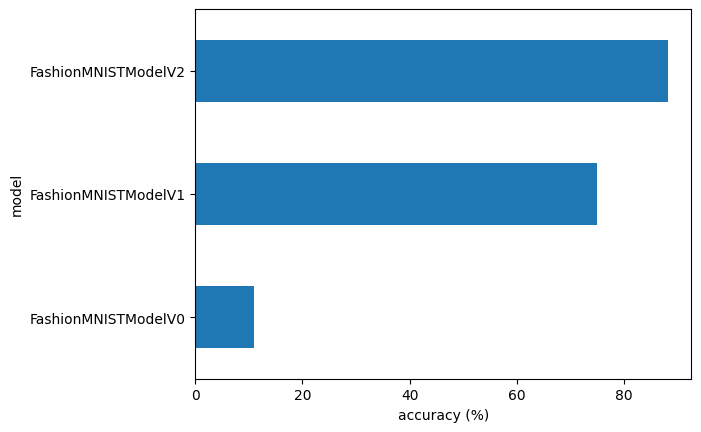

In [110]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [111]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [112]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [113]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7820e-08, 2.8694e-09, 3.7875e-09, 2.6155e-08, 5.3738e-10, 9.9995e-01,
         8.1070e-08, 2.5823e-06, 1.0749e-05, 3.4238e-05],
        [7.7120e-02, 6.0771e-01, 8.8458e-04, 6.2277e-02, 8.4474e-02, 6.8117e-05,
         1.6712e-01, 1.4481e-04, 1.2758e-04, 7.1998e-05]])

In [114]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7820e-08, 2.8694e-09, 3.7875e-09, 2.6155e-08, 5.3738e-10, 9.9995e-01,
         8.1070e-08, 2.5823e-06, 1.0749e-05, 3.4238e-05],
        [7.7120e-02, 6.0771e-01, 8.8458e-04, 6.2277e-02, 8.4474e-02, 6.8117e-05,
         1.6712e-01, 1.4481e-04, 1.2758e-04, 7.1998e-05]])

In [115]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [116]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

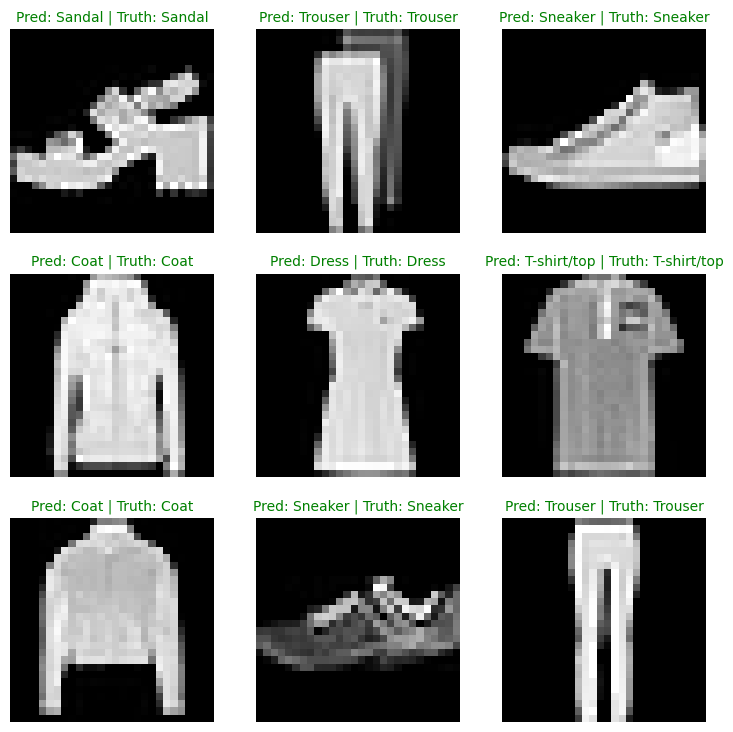

In [117]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### Input and output shapes of a computer vision model

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.10.0+cu111


'cuda'

## Making a confusion matrix for further prediction evaluation

In [118]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [119]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.8 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [120]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


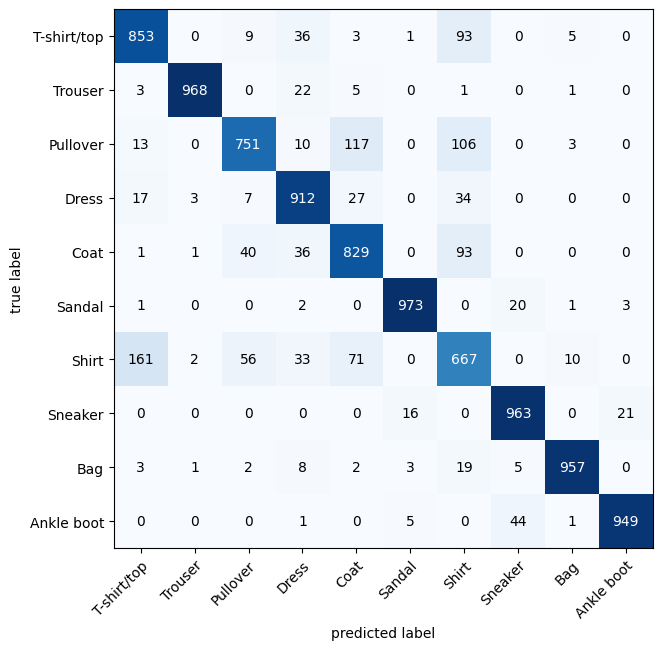

In [121]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## Save and load best performing model

In [122]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [124]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [125]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3238588869571686,
 'model_acc': 88.22883386581469}

In [126]:
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3238588869571686,
 'model_acc': 88.22883386581469}

In [127]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Model may have high variance while having low bias

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Data augumentation

2. L1, L2 Regularization

3. Dropout

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


In [2]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 70934513.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109427004.36it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 18008257.99it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17921475.79it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
image.shape


torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
class_names = train_data.classes
class_names, len(class_names)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

Image shape: torch.Size([1, 28, 28])


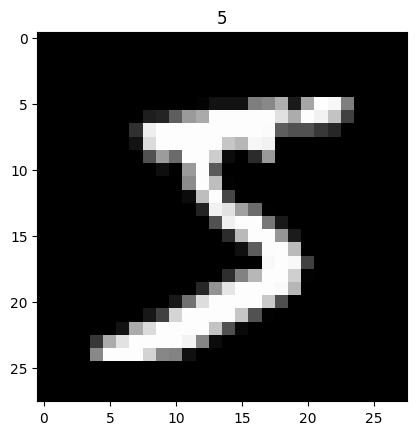

Image shape: torch.Size([1, 28, 28])


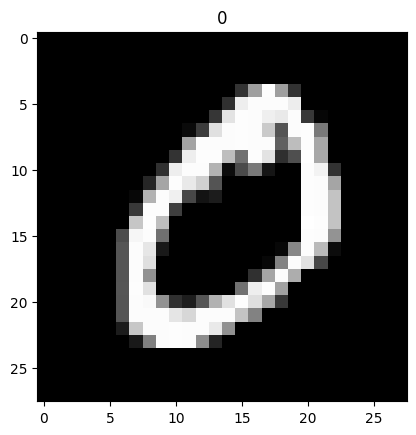

Image shape: torch.Size([1, 28, 28])


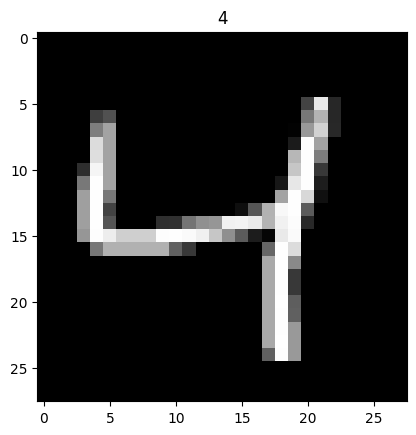

Image shape: torch.Size([1, 28, 28])


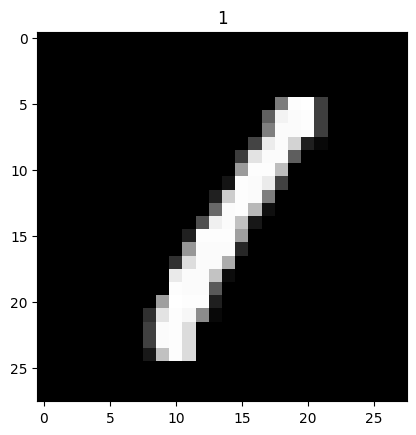

Image shape: torch.Size([1, 28, 28])


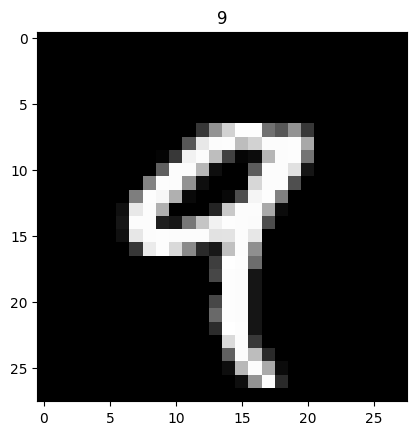

In [12]:
import matplotlib.pyplot as plt
for i in range(5):
  image, label = train_data[i]
  print(f"Image shape: {image.shape}")
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(label);

  plt.show();

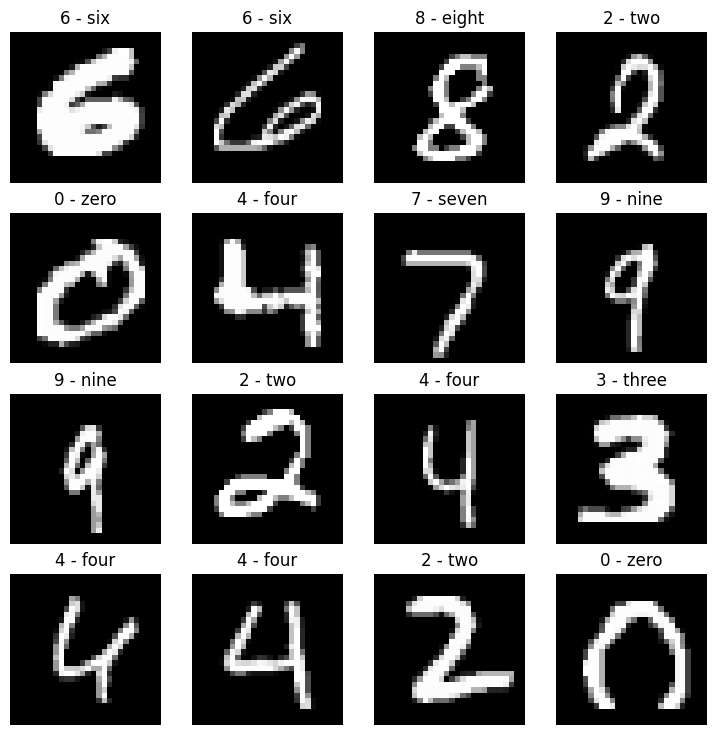

In [13]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [14]:
from torch.utils.data import DataLoader


In [15]:
BATCH_SIZE=32


In [16]:
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)


In [17]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c326dd41f00>, <torch.utils.data.dataloader.DataLoader object at 0x7c326dd43fd0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [18]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


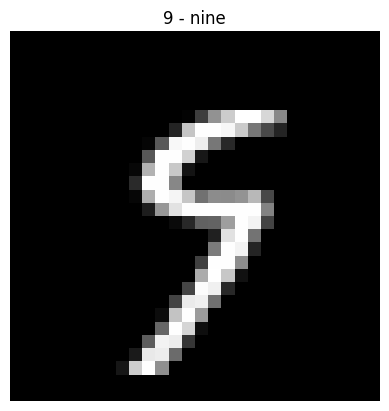

In [19]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis('Off');
print(f"Image size: {img.shape}")
print(f'Label: {label}, label size: {label.shape}')


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?